# CME538 - Introduction to Data Science
## Lecture 3.2 - Importing Data from Different Sources

### Lecture Structure
1. [Delimited Formats](#section1)
2. [Loosely Formatted Text](#section2)
3. [Hierarchical Formats (JSON)](#section3)
4. [Hierarchical Formats (XML)](#section4)
5. [Binary Formats (HDF5)](#section5)
6. [Web Technologies (HTTP)](#section6)
7. [Web Technologies (REST API)](#section7)
8. [Web Technologies (HTML)](#section8)
9. [Web Technologies (Web Scraping)](#section9)

## Setup Notebook

In [3]:
# Import 3rd party libraries
import os
import json 
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")

### Install and Import h5py

In [3]:
!pip install h5py

In [4]:
import h5py

<a id='section1'></a>
## 1. Delimited Formats
Text files are human readable, in contrast to binary files, and can be opened using any text editor (Notepad, Sublime, etc.). Tabular (structured) data that is stored as a text file is often delimited using commas `,`, tabs `\t`, spaces ` `, or pipes `|`. As long as its consistent, any character can be used to delimit a text file. These characters are used to delimit the different columns (fields) in a table. And rows are delimited by a `\n` at the end of each row.

### Comma-Separated Values (CSV)
Let's try opening a `.csv`. This file contains 38765 rows of purchase orders from people at a grocery store. 

In [5]:
groceries = open('groceries_dataset.csv', 'r')
groceries.read()[0:1000]

'Member_number,Date,itemDescription\n1808,21-07-2015,tropical fruit\n2552,05-01-2015,whole milk\n2300,19-09-2015,pip fruit\n1187,12-12-2015,other vegetables\n3037,01-02-2015,whole milk\n4941,14-02-2015,rolls/buns\n4501,08-05-2015,other vegetables\n3803,23-12-2015,pot plants\n2762,20-03-2015,whole milk\n4119,12-02-2015,tropical fruit\n1340,24-02-2015,citrus fruit\n2193,14-04-2015,beef\n1997,21-07-2015,frankfurter\n4546,03-09-2015,chicken\n4736,21-07-2015,butter\n1959,30-03-2015,fruit/vegetable juice\n1974,03-05-2015,packaged fruit/vegetables\n2421,02-09-2015,chocolate\n1513,03-08-2015,specialty bar\n1905,07-07-2015,other vegetables\n2810,08-09-2015,butter milk\n2867,12-11-2015,whole milk\n3962,18-09-2015,tropical fruit\n1088,30-11-2015,tropical fruit\n4976,17-07-2015,bottled water\n4056,12-06-2015,yogurt\n3611,13-02-2015,sausage\n1420,14-01-2015,other vegetables\n4286,08-03-2015,brown bread\n4918,27-01-2015,yogurt\n4783,22-10-2015,hamburger meat\n3709,26-10-2015,root vegetables\n4289,08

In [6]:
groceries = pd.read_csv('groceries_dataset.csv')
groceries.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


### Tab-Separated Values (TSV)
Let's try opening a `.tsv`. 

In [7]:
groceries = open('groceries_dataset.tsv', 'r')
groceries.read()[0:1000]

'Member_number\tDate\titemDescription\n1808\t21-07-2015\ttropical fruit\n2552\t05-01-2015\twhole milk\n2300\t19-09-2015\tpip fruit\n1187\t12-12-2015\tother vegetables\n3037\t01-02-2015\twhole milk\n4941\t14-02-2015\trolls/buns\n4501\t08-05-2015\tother vegetables\n3803\t23-12-2015\tpot plants\n2762\t20-03-2015\twhole milk\n4119\t12-02-2015\ttropical fruit\n1340\t24-02-2015\tcitrus fruit\n2193\t14-04-2015\tbeef\n1997\t21-07-2015\tfrankfurter\n4546\t03-09-2015\tchicken\n4736\t21-07-2015\tbutter\n1959\t30-03-2015\tfruit/vegetable juice\n1974\t03-05-2015\tpackaged fruit/vegetables\n2421\t02-09-2015\tchocolate\n1513\t03-08-2015\tspecialty bar\n1905\t07-07-2015\tother vegetables\n2810\t08-09-2015\tbutter milk\n2867\t12-11-2015\twhole milk\n3962\t18-09-2015\ttropical fruit\n1088\t30-11-2015\ttropical fruit\n4976\t17-07-2015\tbottled water\n4056\t12-06-2015\tyogurt\n3611\t13-02-2015\tsausage\n1420\t14-01-2015\tother vegetables\n4286\t08-03-2015\tbrown bread\n4918\t27-01-2015\tyogurt\n4783\t22-1

In [8]:
groceries = pd.read_csv('groceries_dataset.tsv', sep='\t')
groceries.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


### Pipe-Separated Values (PSV) ??
Let's try opening a `.psv` (I just made this up). 

In [9]:
groceries = open('groceries_dataset.psv', 'r')
groceries.read()[0:1000]

'Member_number|Date|itemDescription\n1808|21-07-2015|tropical fruit\n2552|05-01-2015|whole milk\n2300|19-09-2015|pip fruit\n1187|12-12-2015|other vegetables\n3037|01-02-2015|whole milk\n4941|14-02-2015|rolls/buns\n4501|08-05-2015|other vegetables\n3803|23-12-2015|pot plants\n2762|20-03-2015|whole milk\n4119|12-02-2015|tropical fruit\n1340|24-02-2015|citrus fruit\n2193|14-04-2015|beef\n1997|21-07-2015|frankfurter\n4546|03-09-2015|chicken\n4736|21-07-2015|butter\n1959|30-03-2015|fruit/vegetable juice\n1974|03-05-2015|packaged fruit/vegetables\n2421|02-09-2015|chocolate\n1513|03-08-2015|specialty bar\n1905|07-07-2015|other vegetables\n2810|08-09-2015|butter milk\n2867|12-11-2015|whole milk\n3962|18-09-2015|tropical fruit\n1088|30-11-2015|tropical fruit\n4976|17-07-2015|bottled water\n4056|12-06-2015|yogurt\n3611|13-02-2015|sausage\n1420|14-01-2015|other vegetables\n4286|08-03-2015|brown bread\n4918|27-01-2015|yogurt\n4783|22-10-2015|hamburger meat\n3709|26-10-2015|root vegetables\n4289|08

In [10]:
groceries = pd.read_csv('groceries_dataset.psv', sep='|')
groceries.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


Most of the time, you'll be dealing with `.csv` files when working with tabular files.

<a id='section2'></a>
## 2. Loosely Formatted Text
The [NOAA - Great Lakes Environmental Research Laboratory](https://www.glerl.noaa.gov/res/glcfs/) (GLERL) dataset contains forecasts and measurements for Ice Cover, Wave Height, Current Direction, Wind Speed, and others. 
<br>
<img src="images/noaa.gif" alt="drawing" width="700"/>
<br>
The file is human readable, however, it is not tabular and therefore, cannot be easily imported into a Pandas DataFrame. Don't believe me? Let's give it a try.

First, let's take a look at the file in a text editor. I recommend using [Sublime](https://www.sublimetext.com/). From the text editor, we can see that the fields seems to be delimited by tabs or spaces so lets used `.read_csv` to import our file.

In [11]:
noaa = pd.read_csv('e202027712.0.wav', sep='\t')
noaa.head(10)

,2020 277 13 /glcfs/bathy/erie2km.dat WAVES 6436
0,1 0.121 119 1.7
1,2 0.174 124 2.0
2,3 0.079 98 1.2
3,4 0.153 103 1.9
4,5 0.212 114 2.3
5,6 0.252 117 2.5
6,7 0.285 113 2.6
7,8 0.310 113 2.7
8,9 0.055 88 0.9
9,10 0.122 99 1.5


Something doesn't look right here. Let's try opening the file using the `open()` function which returns a file object, which has helpful methods (`.read()`, `.readline()`) for reading the content of the file. 

In [12]:
noaa = open('e202027712.0.wav', 'r')
print(noaa)

<_io.TextIOWrapper name='e202027712.0.wav' mode='r' encoding='cp1252'>


We can see that the `noaa` variable is a file object. The file class hass a method for reading one line of a file.

In [13]:
print(noaa.readline())

2020 277 13     /glcfs/bathy/erie2km.dat       WAVES                  6436



In [14]:
print(noaa.readline())

     1   0.121  119  1.7



In [15]:
print(noaa.readline())

     2   0.174  124  2.0



In [16]:
print(noaa.readline())

     3   0.079   98  1.2



We can also use `.readline()` in a `for` loop.

In [17]:
for _ in range(10):
    print(noaa.readline())

     4   0.153  103  1.9

     5   0.212  114  2.3

     6   0.252  117  2.5

     7   0.285  113  2.6

     8   0.310  113  2.7

     9   0.055   88  0.9

    10   0.122   99  1.5

    11   0.193  100  2.0

    12   0.249  101  2.3

    13   0.296  102  2.7



If we want to return to the beginning of the file, we must open the file again. 

In [18]:
noaa = open('e202027712.0.wav', 'r')
for _ in range(10):
    print(noaa.readline())

2020 277 13     /glcfs/bathy/erie2km.dat       WAVES                  6436

     1   0.121  119  1.7

     2   0.174  124  2.0

     3   0.079   98  1.2

     4   0.153  103  1.9

     5   0.212  114  2.3

     6   0.252  117  2.5

     7   0.285  113  2.6

     8   0.310  113  2.7

     9   0.055   88  0.9



The `.read()` method, on the other hand, reads the file as an individual string, and allows for relatively easy file-wide manipulations. Below, lets display the first 1000 characters from the file.

In [19]:
noaa = open('e202027712.0.wav', 'r')
noaa.read()[0:1000]

'2020 277 13     /glcfs/bathy/erie2km.dat       WAVES                  6436\n     1   0.121  119  1.7\n     2   0.174  124  2.0\n     3   0.079   98  1.2\n     4   0.153  103  1.9\n     5   0.212  114  2.3\n     6   0.252  117  2.5\n     7   0.285  113  2.6\n     8   0.310  113  2.7\n     9   0.055   88  0.9\n    10   0.122   99  1.5\n    11   0.193  100  2.0\n    12   0.249  101  2.3\n    13   0.296  102  2.7\n    14   0.333  103  2.8\n    15   0.361  105  2.9\n    16   0.384  105  3.0\n    17   0.402  106  3.1\n    18   0.121   51  1.3\n    19   0.145   66  1.5\n    20   0.193   84  1.8\n    21   0.257   93  2.2\n    22   0.307   95  2.5\n    23   0.343   96  2.7\n    24   0.373   96  2.9\n    25   0.395   97  3.0\n    26   0.410   99  3.1\n    27   0.427  101  3.2\n    28   0.442  101  3.3\n    29   0.456  102  3.3\n    30   0.472  102  3.4\n    31   0.488  103  3.4\n    32   0.504  103  3.5\n    33   0.037   88  0.7\n    34   0.040   85  0.7\n    35   0.081   87  1.1\n    36   0.15

And now lets print the first 1000 characters from the file, which created a new line from `\n` newline character.

In [20]:
noaa = open('e202027712.0.wav', 'r')
print(noaa.read()[0:1000])
noaa.close()

2020 277 13     /glcfs/bathy/erie2km.dat       WAVES                  6436
     1   0.121  119  1.7
     2   0.174  124  2.0
     3   0.079   98  1.2
     4   0.153  103  1.9
     5   0.212  114  2.3
     6   0.252  117  2.5
     7   0.285  113  2.6
     8   0.310  113  2.7
     9   0.055   88  0.9
    10   0.122   99  1.5
    11   0.193  100  2.0
    12   0.249  101  2.3
    13   0.296  102  2.7
    14   0.333  103  2.8
    15   0.361  105  2.9
    16   0.384  105  3.0
    17   0.402  106  3.1
    18   0.121   51  1.3
    19   0.145   66  1.5
    20   0.193   84  1.8
    21   0.257   93  2.2
    22   0.307   95  2.5
    23   0.343   96  2.7
    24   0.373   96  2.9
    25   0.395   97  3.0
    26   0.410   99  3.1
    27   0.427  101  3.2
    28   0.442  101  3.3
    29   0.456  102  3.3
    30   0.472  102  3.4
    31   0.488  103  3.4
    32   0.504  103  3.5
    33   0.037   88  0.7
    34   0.040   85  0.7
    35   0.081   87  1.1
    36   0.158   89  1.6
    37   0.221   89  2.0


<a id='section3'></a>
## 3. Hierarchical Formats (JSON)
JavaScript Object Notation (JSON) is a lightweight data format that easy for humans to read and write. JSON is easy for machines to parse and generate and is based on the JavaScript Programming Language Standard. JSON is a text format that is programming language independent and can be early parsed using Python, Ruby, Pearl and many others.

JSON is built on two structures:

1. A collection of name/value pairs. This is realized as an object, record, dictionary, hash table, keyed list, or associative array.
2. An ordered list of values. This is realized as an array, vector, list, or sequence.

There are several third party packages that can be used to program with JSON files, however, Python includes a native package `json`, which we imported at the start of this notebook.

```python
import json
```

The JSON format is used primarily to transmit data between a server and web application, which we'll see more of in Section 7 [API](#section7) and 8 [HTML](#section8). As as example, we'll be working with the [Twitter](https://twitter.com/) JSON structure for tweets. 

Let's take a look at the Twitter tweet below,
<br>
<img src="images/tweet.png" alt="drawing" width="500"/>
<br>
and the associated JSON file.
```json
{
  "created_at": "Thu Apr 06 15:24:15 +0000 2017",
  "id_str": "850006245121695744",
  "text": "1\/ Today we\u2019re sharing our vision for the future of the Twitter API platform!\nhttps:\/\/t.co\/XweGngmxlP",
  "user": {
    "id": 2244994945,
    "name": "Twitter Dev",
    "screen_name": "TwitterDev",
    "location": "Internet",
    "url": "https:\/\/dev.twitter.com\/",
    "description": "Your official source for Twitter Platform news, updates & events. Need technical help? Visit https:\/\/twittercommunity.com\/ \u2328\ufe0f #TapIntoTwitter"
  },
  "place": {   
  },
  "entities": {
    "hashtags": [      
    ],
    "urls": [
      {
        "url": "https:\/\/t.co\/XweGngmxlP",
        "unwound": {
          "url": "https:\/\/cards.twitter.com\/cards\/18ce53wgo4h\/3xo1c",
          "title": "Building the Future of the Twitter API Platform"
        }
      }
    ],
    "user_mentions": [     
    ]
  }
}
```
You'll notice that the data structure is very similar to Python Dictionaries. 

#### Import
First, let's learn how to load a JSON file into Python as a Dictionary. There are two methods for parsing JSON, `json.load()` and `json.loads()`. 

**`json.load()`** can deserialize a file (it accepts a file object).

In [21]:
tweet = json.load(open('tweet.json'))
tweet

{'created_at': 'Thu Apr 06 15:24:15 +0000 2017',
 'id_str': '850006245121695744',
 'text': '1/ Today we’re sharing our vision for the future of the Twitter API platform!\nhttps://t.co/XweGngmxlP',
 'user': {'id': 2244994945,
  'name': 'Twitter Dev',
  'screen_name': 'TwitterDev',
  'location': 'Internet',
  'url': 'https://dev.twitter.com/',
  'description': 'Your official source for Twitter Platform news, updates & events. Need technical help? Visit https://twittercommunity.com/ ⌨️ #TapIntoTwitter'},
 'place': {},
 'entities': {'hashtags': [],
  'urls': [{'url': 'https://t.co/XweGngmxlP',
    'unwound': {'url': 'https://cards.twitter.com/cards/18ce53wgo4h/3xo1c',
     'title': 'Building the Future of the Twitter API Platform'}}],
  'user_mentions': []}}

The following is a useful function for printing JSONs with the correct indentation to improve readability.

In [22]:
def json_print(obj):
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

In [23]:
json_print(tweet)

{
    "created_at": "Thu Apr 06 15:24:15 +0000 2017",
    "entities": {
        "hashtags": [],
        "urls": [
            {
                "unwound": {
                    "title": "Building the Future of the Twitter API Platform",
                    "url": "https://cards.twitter.com/cards/18ce53wgo4h/3xo1c"
                },
                "url": "https://t.co/XweGngmxlP"
            }
        ],
        "user_mentions": []
    },
    "id_str": "850006245121695744",
    "place": {},
    "text": "1/ Today we\u2019re sharing our vision for the future of the Twitter API platform!\nhttps://t.co/XweGngmxlP",
    "user": {
        "description": "Your official source for Twitter Platform news, updates & events. Need technical help? Visit https://twittercommunity.com/ \u2328\ufe0f #TapIntoTwitter",
        "id": 2244994945,
        "location": "Internet",
        "name": "Twitter Dev",
        "screen_name": "TwitterDev",
        "url": "https://dev.twitter.com/"
    }
}


The variable `tweet` is now a Python Dictionary.

In [24]:
type(tweet)

dict

**`json.loads()`** deserializes a string (the `s` stands for String - "load string").

In [25]:
json_string = '{"name": "Sebastian", "age": 35}'
json_dict = json.loads(json_string)
json_dict

{'name': 'Sebastian', 'age': 35}

#### Save
Like with importing JSONs, there are two functions for saving JSON files, `json.dump()` and `json.dumps()`.

**`json.dump()`** is used to write Python serialized object as JSON formatted data into a file. For example, if we take the `tweet` dictionary, we can save it to a file using `json.dump()`.

In [29]:
with open('test_file.json', 'w') as f:
    json.dump(tweet, f) # indent=4

**`json.dumps()`** encodes any Python object into JSON formatted String. For example, if we take the `tweet` dictionary, we can save it to a string using `json.dumps()`.

In [27]:
json_string = json.dumps(tweet)
json_string 

'{"created_at": "Thu Apr 06 15:24:15 +0000 2017", "id_str": "850006245121695744", "text": "1/ Today we\\u2019re sharing our vision for the future of the Twitter API platform!\\nhttps://t.co/XweGngmxlP", "user": {"id": 2244994945, "name": "Twitter Dev", "screen_name": "TwitterDev", "location": "Internet", "url": "https://dev.twitter.com/", "description": "Your official source for Twitter Platform news, updates & events. Need technical help? Visit https://twittercommunity.com/ \\u2328\\ufe0f #TapIntoTwitter"}, "place": {}, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/XweGngmxlP", "unwound": {"url": "https://cards.twitter.com/cards/18ce53wgo4h/3xo1c", "title": "Building the Future of the Twitter API Platform"}}], "user_mentions": []}}'

Although they appear similar, there are some important differences between Python Dictionaries and JSONs.

| Python  | JSON   |
|---------|--------|
|dict	  | Object | 
|list	  | Array  | 
|tuple	  | Array  |
|str	  | String |
|int	  | Number |
|float	  | Number |
|True	  | true   |
|False	  | false  |
|None	  | null   |

For example, this means that you cannot include a tuple or a list in a JSON. They will both be incoded as an array. Similarly, you cannot encode a NumPy array in a JSON. Let's give it a try.

In [28]:
sample_data = {'counts': np.array([0, 5, 4, 10, 45])} 
json_string = json.dumps(sample_data)
json_string 

TypeError: Object of type ndarray is not JSON serializable

You can learn more about the JSONs by visiting its official [page](https://docs.python.org/3.6/library/json.html) on the Python website.

<a id='section4'></a>
## 4. Hierarchical Formats (XML)
Extensible Markup Language (XML) is a markup language that defines a set of rules for encoding documents in a format that is both human-readable and machine-readable. XML is similar to HTML. Python contains a native module for reading XML which we imported at the start of the notebook.
```python
import xml.etree.ElementTree as ET
```
Below is an example of the XML file structure containing the names of employees at a company.
```xml
<employees>
  <employee>
    <firstName>John</firstName> <lastName>Doe</lastName>
  </employee>
  <employee>
    <firstName>Anna</firstName> <lastName>Smith</lastName>
  </employee>
  <employee>
    <firstName>Peter</firstName> <lastName>Jones</lastName>
  </employee>
</employees>
```
Let's try importing a sample XML file.

In [28]:
tree = ET.parse('books.xml')
root = tree.getroot()

The file we opened `books.xml` looks like this.
```xml
<catalog>
   <book id="bk101">
      <author>Gambardella, Matthew</author>
      <title>XML Developer's Guide</title>
      <genre>Computer</genre>
      <price>44.95</price>
      <publish_date>2000-10-01</publish_date>
      <description>An in-depth look at creating applications 
      with XML.</description>
   </book>
   <book id="bk102">
      <author>Ralls, Kim</author>
      <title>Midnight Rain</title>
      <genre>Fantasy</genre>
      <price>5.95</price>
      <publish_date>2000-12-16</publish_date>
      <description>A former architect battles corporate zombies, 
      an evil sorceress, and her own childhood to become queen 
      of the world.</description>
   </book>
   <book id="bk103">
      <author>Corets, Eva</author>
      <title>Maeve Ascendant</title>
      <genre>Fantasy</genre>
      <price>5.95</price>
      <publish_date>2000-11-17</publish_date>
      <description>After the collapse of a nanotechnology 
      society in England, the young survivors lay the 
      foundation for a new society.</description>
   </book>
   <book id="bk104">
      <author>Corets, Eva</author>
      <title>Oberon's Legacy</title>
      <genre>Fantasy</genre>
      <price>5.95</price>
      <publish_date>2001-03-10</publish_date>
      <description>In post-apocalypse England, the mysterious 
      agent known only as Oberon helps to create a new life 
      for the inhabitants of London. Sequel to Maeve 
      Ascendant.</description>
   </book>
   <book id="bk105">
      <author>Corets, Eva</author>
      <title>The Sundered Grail</title>
      <genre>Fantasy</genre>
      <price>5.95</price>
      <publish_date>2001-09-10</publish_date>
      <description>The two daughters of Maeve, half-sisters, 
      battle one another for control of England. Sequel to 
      Oberon's Legacy.</description>
   </book>
   <book id="bk106">
      <author>Randall, Cynthia</author>
      <title>Lover Birds</title>
      <genre>Romance</genre>
      <price>4.95</price>
      <publish_date>2000-09-02</publish_date>
      <description>When Carla meets Paul at an ornithology 
      conference, tempers fly as feathers get ruffled.</description>
   </book>
   <book id="bk107">
      <author>Thurman, Paula</author>
      <title>Splish Splash</title>
      <genre>Romance</genre>
      <price>4.95</price>
      <publish_date>2000-11-02</publish_date>
      <description>A deep sea diver finds true love twenty 
      thousand leagues beneath the sea.</description>
   </book>
   <book id="bk108">
      <author>Knorr, Stefan</author>
      <title>Creepy Crawlies</title>
      <genre>Horror</genre>
      <price>4.95</price>
      <publish_date>2000-12-06</publish_date>
      <description>An anthology of horror stories about roaches,
      centipedes, scorpions  and other insects.</description>
   </book>
   <book id="bk109">
      <author>Kress, Peter</author>
      <title>Paradox Lost</title>
      <genre>Science Fiction</genre>
      <price>6.95</price>
      <publish_date>2000-11-02</publish_date>
      <description>After an inadvertant trip through a Heisenberg
      Uncertainty Device, James Salway discovers the problems 
      of being quantum.</description>
   </book>
   <book id="bk110">
      <author>O'Brien, Tim</author>
      <title>Microsoft .NET: The Programming Bible</title>
      <genre>Computer</genre>
      <price>36.95</price>
      <publish_date>2000-12-09</publish_date>
      <description>Microsoft's .NET initiative is explored in 
      detail in this deep programmer's reference.</description>
   </book>
   <book id="bk111">
      <author>O'Brien, Tim</author>
      <title>MSXML3: A Comprehensive Guide</title>
      <genre>Computer</genre>
      <price>36.95</price>
      <publish_date>2000-12-01</publish_date>
      <description>The Microsoft MSXML3 parser is covered in 
      detail, with attention to XML DOM interfaces, XSLT processing, 
      SAX and more.</description>
   </book>
   <book id="bk112">
      <author>Galos, Mike</author>
      <title>Visual Studio 7: A Comprehensive Guide</title>
      <genre>Computer</genre>
      <price>49.95</price>
      <publish_date>2001-04-16</publish_date>
      <description>Microsoft Visual Studio 7 is explored in depth,
      looking at how Visual Basic, Visual C++, C#, and ASP+ are 
      integrated into a comprehensive development 
      environment.</description>
   </book>
</catalog>
```
From the root of the XML tree, we can get all children, which should correspond to the 12 book tags we see. be can use the Python `list()` operator to do this.

In [29]:
for book in list(root):
    print(book.tag, book.attrib)
    print(book.find('author').text)
    print(book.find('title').text)
    print()

book {'id': 'bk101'}
Gambardella, Matthew
XML Developer's Guide

book {'id': 'bk102'}
Ralls, Kim
Midnight Rain

book {'id': 'bk103'}
Corets, Eva
Maeve Ascendant

book {'id': 'bk104'}
Corets, Eva
Oberon's Legacy

book {'id': 'bk105'}
Corets, Eva
The Sundered Grail

book {'id': 'bk106'}
Randall, Cynthia
Lover Birds

book {'id': 'bk107'}
Thurman, Paula
Splish Splash

book {'id': 'bk108'}
Knorr, Stefan
Creepy Crawlies

book {'id': 'bk109'}
Kress, Peter
Paradox Lost

book {'id': 'bk110'}
O'Brien, Tim
Microsoft .NET: The Programming Bible

book {'id': 'bk111'}
O'Brien, Tim
MSXML3: A Comprehensive Guide

book {'id': 'bk112'}
Galos, Mike
Visual Studio 7: A Comprehensive Guide



JSON and XML are similar in some ways

- Both JSON and XML are "self describing" (human readable)
- Both JSON and XML are hierarchical (values within values)
- Both JSON and XML can be parsed and used by lots of programming languages
- Both JSON and XML can be fetched with an http request

and different in other ways.

- JSON doesn't use end tag
- JSON is shorter
- JSON is quicker to read and write
- JSON can use arrays

<a id='section5'></a>
## 5. Binary Formats (HDF5)
Hierarchical Data Format (HDF) is a set of file formats (HDF4, HDF5) designed to store and organize large amounts of data. It was originally developed at the **National Center for Supercomputing Applications** and is now supported by [The HDF Group](https://www.hdfgroup.org/solutions/hdf5/), a non-profit corporation.
<br>
<img src="images/hdf5_structure4.jpg" alt="drawing" width="550"/>
<br>
Let's see what the [The HDF Group](https://www.hdfgroup.org/solutions/hdf5/) says about the HDF5 file structure.

In [30]:
%%HTML
'<iframe src="https://player.vimeo.com/video/226008481" width="640" height="360" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>'

The Python package [h5py](https://www.h5py.org/) is required for working with HFD5 files. You'll see we installed and imported that package at the start of the Notebook.

```python
!pip install h5py

import h5py
```

For working exploring the HDF5 file structure, we'll be working with Hyperspectral Imagery data which is a dataset that Civil & Mineral Engineers might run into. 
<br>
<img src="images/light_spectrum.jpg" alt="drawing" width="800"/>
<br>
Hyperspectral imaging collects information from across the electromagnetic spectrum, which can be seen in the image below. Most familiar to us is the visible light spectrum ranging from red (700 nanometers) to violet (380 nanometers). Hyperspectral imagery is acquired in the infrared spectrum typically between 400 and 1100 nanometers.    
<br>
<img src="images/hyperspectral_image.png" alt="drawing" width="900"/>
<br>
A typical JPEG image that you might capture with your smartphone will have three color channels (Red, Green, and Blue). So, if your image is 500 pixels x 500 pixels (spatial dimensions), there will be a 3rd dimension of size three (3 color challanges). When imported into Python as an array, the shape of the array would be (500, 500, 3). With hyperspectral imagery, you're acquiring a continuous spectrum and thus, each pixel contains many more than three values as displayed in the image above. 

Let's use [h5py](https://www.h5py.org/) to import a hyperspectral image.

In [31]:
hyperspec = h5py.File('NEON_hyperspectral_dataset.h5', mode='r') 

First, lets see what groups are inside the file object.

In [32]:
print(hyperspec.keys())

<KeysViewHDF5 ['SJER']>


and what groups are inside that group.

In [33]:
print(hyperspec['SJER'].keys())

<KeysViewHDF5 ['Reflectance']>


and what groups are inside that group.

In [34]:
print(hyperspec['SJER']['Reflectance'].keys())

<KeysViewHDF5 ['Metadata', 'Reflectance_Data']>


and what groups are inside the Metadata group.

In [35]:
print(hyperspec['SJER']['Reflectance']['Metadata'].keys())

<KeysViewHDF5 ['Coordinate_System', 'Spectral_Data']>


You're starting to get the picture right? HDF5 is just a hierarchical folder structure as the name suggests.

Quick tip: We can make the same call as above using the following command.

In [36]:
print(hyperspec['SJER/Reflectance/Metadata'].keys())

<KeysViewHDF5 ['Coordinate_System', 'Spectral_Data']>


In [37]:
def plot_hyperspectral_data():
    hyperspec = h5py.File('NEON_hyperspectral_dataset.h5', mode='r') 
    sjer_reflectance = hyperspec['SJER']['Reflectance']
    sjer_reflectance_array = sjer_reflectance['Reflectance_Data']
    reflectance_shape = sjer_reflectance_array.shape
    wavelengths = sjer_reflectance['Metadata']['Spectral_Data']['Wavelength']
    sjer_mapInfo = sjer_reflectance['Metadata']['Coordinate_System']['Map_Info']
    mapInfo_string = str(sjer_mapInfo[()])
    mapInfo_split = mapInfo_string.split(',') 
    res = float(mapInfo_split[5]), float(mapInfo_split[6])
    xMin = float(mapInfo_split[3]) 
    yMax = float(mapInfo_split[4])
    xMax = xMin + (reflectance_shape[1] * res[0])
    yMin = yMax - (reflectance_shape[0] * res[1])
    serc_ext = (xMin, xMax, yMin, yMax)
    b56 = sjer_reflectance_array[:, :, 55].astype(float)
    
    
    fig, ax = plt.subplots()
    img = ax.imshow(b56, extent=serc_ext, cmap='jet')
    ax.set_xlabel('Longitude', fontsize=16)
    ax.set_ylabel('Latitude', fontsize=16)
    plt.colorbar(img, label='Reflectance', ax=ax)
    plt.show()

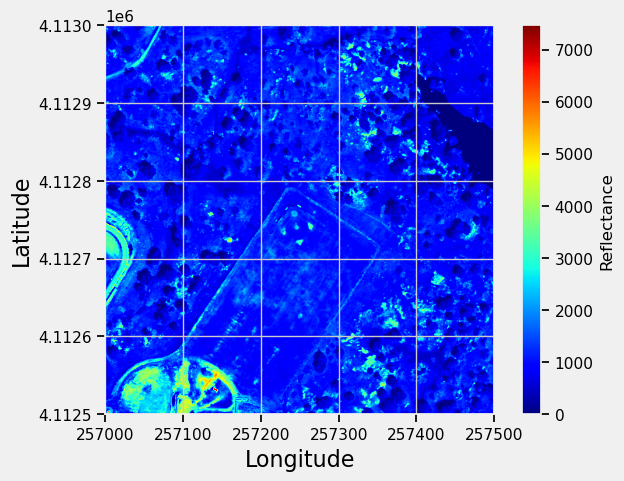

In [38]:
plot_hyperspectral_data()

A more indepth look at the HDF file structure is beyond the scope of this course. For those interested in learning more about HDF, Python, and hyperspectral data, check out the excellent resources from 
[The National Science Foundation's National Ecological Observatory Network (NEON)](https://www.neonscience.org/neon-aop-hdf5-py).

<a id='section6'></a>
## 6. Web Technologies (HTTP)
First lets import a very popular library for making http requests.

In [1]:
import requests

Next, let's make a simple http GET request for the UofT Civil & Mineral Engineering website.

In [2]:
my_response = requests.get('http://www.civmin.utoronto.ca')

Now let's print the response as text.

In [3]:
my_response.text

'<!DOCTYPE html>\r\n<html lang="en-US">\r\n\r\n<head>\r\n\r\n\t<meta charset="UTF-8">\r\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\r\n\t<link rel="profile" href="https://gmpg.org/xfn/11">\r\n\t<link rel="pingback" href="https://civmin.utoronto.ca/xmlrpc.php">\r\n\r\n\t\t<meta name="description" content="">\r\n\t<meta property="og:url" content="https://civmin.utoronto.ca"/>\r\n\t<meta property="og:site_name" content="Department of Civil &amp; Mineral Engineering" />\r\n\t<meta property="og:image" content="" />\r\n\t<meta property="og:description" content="" />\r\n\t<meta property="og:title" content="Department of Civil &amp; Mineral Engineering" />\r\n\t<!-- Twitter -->\r\n\t<meta name="twitter:card" content="summary_large_image" />\r\n\t<meta name="twitter:domain" content="https://civmin.utoronto.ca" />\r\n\t<meta name="twitter:title" content="Department of Civil &amp; Mineral Engineering" />\r\n\t<meta name="twitter:description" content="" />\r\n\t\t\t\r\n

Its a bit hard to read as unformatted text so let's use BeautifulSoup (more on this later) to print the html code in a very pretty way.

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(my_response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <link href="https://civmin.utoronto.ca/xmlrpc.php" rel="pingback"/>
  <meta content="" name="description"/>
  <meta content="https://civmin.utoronto.ca" property="og:url">
   <meta content="Department of Civil &amp; Mineral Engineering" property="og:site_name">
    <meta content="" property="og:image">
     <meta content="" property="og:description"/>
     <meta content="Department of Civil &amp; Mineral Engineering" property="og:title"/>
     <!-- Twitter -->
     <meta content="summary_large_image" name="twitter:card"/>
     <meta content="https://civmin.utoronto.ca" name="twitter:domain"/>
     <meta content="Department of Civil &amp; Mineral Engineering" name="twitter:title"/>
     <meta content="" name="twitter:description"/>
     <title>
      Department of Civil &amp; Mineral Enginee

### Request
Now, let's check out the different attribute of our get request.

**URL**

In [5]:
my_response.request.url

'https://civmin.utoronto.ca/'

**Headers**

In [6]:
for key in my_response.request.headers:
    print(f'{key}: {my_response.request.headers[key]}')

User-Agent: python-requests/2.28.1
Accept-Encoding: gzip, deflate, br
Accept: */*
Connection: keep-alive


**Body**

In [27]:
my_response.request.body

### Response
Now, let's check out the different attribute of our the response.

**Status Code**

In [31]:
my_response.status_code

200

**Encoding**

In [32]:
my_response.encoding

'UTF-8'

**Headers**

In [7]:
for key in my_response.headers:
    print(f'{key}: {my_response.headers[key]}')

Date: Tue, 19 Sep 2023 20:28:33 GMT
Server: Apache/2.4.6
X-Powered-By: PHP/7.3.33
X-Pingback: https://civmin.utoronto.ca/xmlrpc.php
Link: <https://civmin.utoronto.ca/wp-json/>; rel="https://api.w.org/", <https://civmin.utoronto.ca/wp-json/wp/v2/pages/27502>; rel="alternate"; type="application/json", <https://civmin.utoronto.ca/>; rel=shortlink
Keep-Alive: timeout=5, max=100
Connection: Keep-Alive
Transfer-Encoding: chunked
Content-Type: text/html; charset=UTF-8


**Text**

In [9]:
my_response.text[0:500]

'<!DOCTYPE html>\r\n<html lang="en-US">\r\n\r\n<head>\r\n\r\n\t<meta charset="UTF-8">\r\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\r\n\t<link rel="profile" href="https://gmpg.org/xfn/11">\r\n\t<link rel="pingback" href="https://civmin.utoronto.ca/xmlrpc.php">\r\n\r\n\t\t<meta name="description" content="">\r\n\t<meta property="og:url" content="https://civmin.utoronto.ca"/>\r\n\t<meta property="og:site_name" content="Department of Civil &amp; Mineral Engineering" />\r\n\t<meta property="og:image" conten'

In [14]:
type(my_response.text[0:500])

str

**Content**

In [13]:
my_response.content[0:500]

b'<!DOCTYPE html>\r\n<html lang="en-US">\r\n\r\n<head>\r\n\r\n\t<meta charset="UTF-8">\r\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\r\n\t<link rel="profile" href="https://gmpg.org/xfn/11">\r\n\t<link rel="pingback" href="https://civmin.utoronto.ca/xmlrpc.php">\r\n\r\n\t\t<meta name="description" content="">\r\n\t<meta property="og:url" content="https://civmin.utoronto.ca"/>\r\n\t<meta property="og:site_name" content="Department of Civil &amp; Mineral Engineering" />\r\n\t<meta property="og:image" conten'

In [15]:
type(my_response.content[0:500])

bytes

### Bad Request

In [26]:
my_response = requests.get('http://www.civmin.utoronto.ca/sebs_mug_shot.jpg')

In [27]:
my_response.status_code

404

### Requesting an Image Resource
Check out [this](https://civmin.utoronto.ca/wp-content/uploads/bb-plugin/cache/IMG_5997_cropped-portrait-6ba5eb61ff3b97f3ca8b900ec4c00e9e-5e33200789147.jpg) picture of Seb.

In [29]:
my_response = requests.get('https://civmin.utoronto.ca/wp-content/uploads/bb-plugin/cache/IMG_5997_cropped-portrait-6ba5eb61ff3b97f3ca8b900ec4c00e9e-5e33200789147.jpg')

In [34]:
my_response.status_code

200

In [35]:
my_response.encoding

In [38]:
my_response.text[0:200]

'����\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00�� �Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x0f\x01\x00\x00\x03\x00\x00\x00\x01\x0b�\x00\x00\x01\x01\x00\x03\x00\x00\x00\x01\x0f�\x00\x00\x01\x02\x00\x03\x00\x00\x00\x03\x00\x00\x00�\x01\x06\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x01\x0f\x00\x02\x00\x00\x00\x06\x00\x00\x00�\x01\x10\x00\x02\x00\x00\x00\t\x00\x00\x00�\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x15\x00\x03\x00\x00\x00\x01\x00\x03\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00�\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00�\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00"\x00\x00\x00�\x012\x00\x02\x00\x00\x00\x14\x00\x00\x01\t\x02\x13\x00\x03'

In [39]:
my_response.content[0:200]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1 \xfcExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x0f\x01\x00\x00\x03\x00\x00\x00\x01\x0b\xd0\x00\x00\x01\x01\x00\x03\x00\x00\x00\x01\x0f\xc0\x00\x00\x01\x02\x00\x03\x00\x00\x00\x03\x00\x00\x00\xc2\x01\x06\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x01\x0f\x00\x02\x00\x00\x00\x06\x00\x00\x00\xc8\x01\x10\x00\x02\x00\x00\x00\t\x00\x00\x00\xce\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x15\x00\x03\x00\x00\x00\x01\x00\x03\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00\xd7\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\xdf\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00"\x00\x00\x00\xe7\x012\x00\x02\x00\x00\x00\x14\x00\x00\x01\t\x02\x13\x00\x03'

<a id='section7'></a>
## 7. Web Technologies (REST API)
You can learn how to work with the CoinGecko API [here](https://www.coingecko.com/en/api/documentation).

Let's first work with the `/simple/price` route. 

In [9]:
base_url = 'https://api.coingecko.com/api/v3/'
route = 'simple/price'
params = {'ids': 'bitcoin,litecoin,ethereum,fantom,', 'vs_currencies': 'usd,eur,aud,cad'}

my_response = requests.get(base_url + route, params=params)

price_df = pd.DataFrame(my_response.json())
price_df.head() 

,bitcoin,ethereum,fantom,litecoin
usd,27323,1648.06,0.194803,67.32
eur,25571,1542.37,0.182311,63.00
aud,42343,2554.06,0.301894,104.32
cad,36742,2216.18,0.261956,90.52


Let's check out the `URL` we created.

In [10]:
my_response.url

'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin%2Clitecoin%2Cethereum%2Cfantom%2C&vs_currencies=usd%2Ceur%2Caud%2Ccad'

Now let's work with the `/coins/list` route.

In [15]:
base_url = 'https://api.coingecko.com/api/v3/'
route = 'coins/list'

my_response = requests.get(base_url + route)

coins_df = pd.DataFrame(my_response.json())
coins_df.head() 

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0-knowledge-network,0kn,0 Knowledge Network
3,0vix-protocol,vix,0VIX Protocol
4,0x,zrx,0x Protocol


Now let's work with the `/coins/{id}/market_chart` route.

In [34]:
base_url = 'https://api.coingecko.com/api/v3/'
coin = 'bitcoin'
route = 'coins/{}/market_chart'.format(coin)
params = {'vs_currency': 'usd', 'days': '30'}

my_response = requests.get(base_url + route, params=params)

market_chart_data = pd.DataFrame(my_response.json()['prices'], columns=['TimeStamp', 'Price'])
market_chart_data['Date'] = pd.to_datetime(market_chart_data['TimeStamp'], unit='ms')
market_chart_data.head()

,TimeStamp,Price,Date
0,1692583250503,26126.441144,2023-08-21 02:00:50.503
1,1692586845016,26091.929554,2023-08-21 03:00:45.016
2,1692590459472,26083.627019,2023-08-21 04:00:59.472
3,1692594043716,26045.598640,2023-08-21 05:00:43.716
4,1692597716659,26095.680485,2023-08-21 06:01:56.659


Now let's aggrigate the data to set the opening, closing, min and max price for each dat.

In [35]:
candlestick_data = market_chart_data.groupby(market_chart_data.Date.dt.date).agg({'Price': ['min', 'max', 'first', 'last']})
candlestick_data.head()

Price                                          
                     min           max         first          last
Date                                                              
2023-08-21  25929.420521  26206.036112  26126.441144  26139.901849
2023-08-22  25670.789710  26119.005959  26119.005959  25798.381381
2023-08-23  25872.696876  26641.120068  26033.675407  26442.264848
2023-08-24  25999.028648  26507.185074  26425.544590  26099.954008
2023-08-25  25836.021433  26141.325678  26137.987984  26037.451965

Lastly, let's plot the data using the amazing Plotly package.

In [36]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=candlestick_data.index,
                open=candlestick_data['Price']['first'],
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'],
                close=candlestick_data['Price']['last'])])

fig.show()

<a id='section8'></a>
## 8. Web Technologies (HTML)
HTML stands for Hyper Text Markup Language and is the language that defines the structure of every webpage you visit. Most browsers haver a builtin debug tool that will allow you to see the HTML associated with each webpage you visit. Checkout [the CivMin](https://civmin.utoronto.ca/) site and press F12 on your keyboard.

Below is an example of some simple HTML.

```html
<html>
    <head>
        <title>
            A Simple HTML Document
        </title>
    </head>
    <body>
        <p>This is a very simple HTML document</p>
        <p>It only has two paragraphs</p>
    </body>
</html>
```

Text surrounded with `< >` are called `tags` and as you can see from the HTML above, there are manu different types of tags.

- HTML tag: It is the root of the html document which is used to specify that the document is html. <br>
  `<html> Statements... </html>` <br>
- Head tag: Head tag is used to contain all the head element in the html file. It contains the title, style, meta, … etc tag. <br>
  `<head> Statements... </head>` <br>
- Body tag: It is used to define the body of html document. It contains image, tables, lists, … etc. <br>
  `<body> Statements... </body>` <br>
- Title tag: It is used to define the title of html document. <br>
 `<title> Statements... </title>` <br>
- Heading tag: It is used to define the heading of html document. <br>
  `<h1> Statements... </h1>` <br>
  `<h2> Statements... </h2>` <br>
  `<h3> Statements... </h3>` <br>
  `<h4> Statements... </h4>` <br>
  `<h5> Statements... </h5>` <br>
  `<h6> Statements... </h6>` <br>
- Paragraph tag: It is used to define paragraph content in html document. <br>
  `<p> Statements... </p>` <br>
- Anchor tag: It is used to link one page to another page. <br>
  `<a href="..."> Statements... </a>` <br>
- List tag: It is used to list the content. <br>
  `<li> Statements... </li>` <br>
- Ordered List tag: It is used to list the content in a particular order. <br>
  `<ol> Statements... </ol>` <br>
- Unordered List tag: It is used to list the content without order. <br>
  `<ul> Statements... </ul>`
  
Let's first check out a very simple webpage. Remember the NOAA file we worked with in [Section 2: Loosely Formatted Text Data](#section2)? This [website](https://www.glerl.noaa.gov/emf/waves/GLERL-Donelan-Archive/2021/) contains forecast files and measurements for Wave parameters such as heigh and direction. Let's say we want to analysis this data and need a way to programmatically extract the download links for all Wave Height forcast files. The HTML on this webpage looks like this (Go to the webpage and hit F12 to check it our for yourself).

```html
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>Index of /emf/waves/GLERL-Donelan-Archive/2021</title>
 </head>
 <body>
  <h1>Index of /emf/waves/GLERL-Donelan-Archive/2021</h1>
  <table>
   <tbody>   
    <tr></tr>
    <tr></tr>
    <tr></tr> 
    <tr>
     <td></td>
     <td></td>
     <td>2021-02-23 06:12</td>  
     <td>67M</td>
     <td></td>   
    </tr>
```

Let's use the `requests.get()` function to get the HTML code from this home page.

In [33]:
response = requests.get('https://www.glerl.noaa.gov/emf/waves/GLERL-Donelan-Archive/2021/')
response.text[0:1000]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<html>\n <head>\n  <title>Index of /emf/waves/GLERL-Donelan-Archive/2021</title>\n </head>\n <body>\n<h1>Index of /emf/waves/GLERL-Donelan-Archive/2021</h1>\n  <table>\n   <tr><th valign="top"><img src="/icons/blank.gif" alt="[ICO]"></th><th><a href="?C=N;O=D">Name</a></th><th><a href="?C=M;O=A">Last modified</a></th><th><a href="?C=S;O=A">Size</a></th><th><a href="?C=D;O=A">Description</a></th></tr>\n   <tr><th colspan="5"><hr></th></tr>\n<tr><td valign="top"><img src="/icons/back.gif" alt="[PARENTDIR]"></td><td><a href="/emf/waves/GLERL-Donelan-Archive/">Parent Directory</a></td><td>&nbsp;</td><td align="right">  - </td><td>&nbsp;</td></tr>\n<tr><td valign="top"><img src="/icons/unknown.gif" alt="[   ]"></td><td><a href="c2021.nc">c2021.nc</a></td><td align="right">2022-02-15 14:20  </td><td align="right">779M</td><td>&nbsp;</td></tr>\n<tr><td valign="top"><img src="/icons/unknown.gif" alt="[   ]"></td><td><a href="c2021_05.in

<a id='section9'></a>
## 9. Web Technologies (Web Scraping)

Next, we'll use BeautifulSoup to parse the HTML from the [IMDB "Top 100" (Sorted by Popularity Ascending)](https://www.imdb.com/search/title/?groups=top_100&ref_=adv_prv). 

First, let's get the HTML.

In [4]:
imdb_url = "https://www.imdb.com/search/title/?groups=top_100&ref_=adv_prv"

response = requests.get(imdb_url)
print(response.text[0:200])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         

        <meta charset="utf-8">




        <script type="text/javascrip


Next, let's use `BeautifulSoup` to help use parse and search the HTML code.

In [6]:
soup = BeautifulSoup(response.text, "html.parser")

This `BeautifulSoup` object can be used to look for tags with particular attributes that contain the data we want to scrape. in this case, we want to look for `<div>` tags with `class='lister-item mode-advanced'`.

In [30]:
movies = soup.find_all('div', class_='lister-item mode-advanced')

`divs` is a list of 100 contains each containing a movie. Let's check out the first item in the list. At the time this Notebook was created, this should be the movie Oppenheimer.

In [31]:
print(movies[0].prettify())

<div class="lister-item mode-advanced">
 <div class="lister-top-right">
  <div class="ribbonize" data-caller="filmosearch" data-tconst="tt15398776">
  </div>
 </div>
 <div class="lister-item-image float-left">
  <a href="/title/tt15398776/">
   <img alt="Oppenheimer" class="loadlate" data-tconst="tt15398776" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMDBmYTZjNjUtN2M1MS00MTQ2LTk2ODgtNzc2M2QyZGE5NTVjXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
  </a>
 </div>
 <div class="lister-item-content">
  <h3 class="lister-item-header">
   <span class="lister-item-index unbold text-primary">
    1.
   </span>
   <a href="/title/tt15398776/">
    Oppenheimer
   </a>
   <span class="lister-item-year text-muted unbold">
    (2023)
   </span>
  </h3>
  <p class="text-muted">
   <span class="certificate">
    14A
   </span>
   <span class="ghost">
    |
   </span>
   <span class="runtime">
  

Next, let's figure out how to extract the `name`, `year`, `runtime`, and `rating` of each movie. First, let's grab the first movie and save it to a variable called `movie`.

In [32]:
movie = movies[0]

### Movie Name
Let's figure out how to find the movie name.

In [21]:
name = movie.h3.a.text
print(name)

Oppenheimer


### Year Released
Let's figure out how to find the year the movie was released.

In [24]:
year = movie.h3.find('span', class_='lister-item-year').text.strip('()')
print(year)

2023


### Movie Runtime
Let's figure out how to find the run time of the movie.

In [26]:
runtime = int(movie.p.find('span', class_='runtime').text.strip(' min'))
print(runtime)

180


### Movie Rating
Let's figure out how to find the movie rating.

In [28]:
rating = float(movie.strong.text)
print(rating)

8.6


How was can build a `for` loop to loop through all 100 movies and extract these four attributes.

In [34]:
names = []
years = []
runtimes = []
ratings = []

for movie in movies:
    
    name = movie.h3.a.text
    names.append(name)
    
    year = movie.h3.find('span', class_='lister-item-year').text.strip('()')
    years.append(year)
    
    runtime = int(movie.p.find('span', class_='runtime').text.strip(' min'))
    runtimes.append(runtime)
    
    rating = float(movie.strong.text)
    ratings.append(rating)
       
movies_df = pd.DataFrame({
    'name': names,
    'year': years,
    'runtime': runtimes,
    'rating': ratings
})    

movies_df.head()

,name,year,runtime,rating
0,Oppenheimer,2023,180,8.6
1,Spider-Man: Across the Spider-Verse,2023,140,8.7
2,Interstellar,2014,169,8.7
3,The Godfather,1972,175,9.2
4,The Shawshank Redemption,1994,142,9.3


Now let's sort by the rating.

In [38]:
movies_df.sort_values('rating', ascending=False).head()

,name,year,runtime,rating
4,The Shawshank Redemption,1994,142,9.3
3,The Godfather,1972,175,9.2
45,The Lord of the Rings: The Return of the King,2003,201,9.0
26,Schindler's List,1993,195,9.0
5,The Dark Knight,2008,152,9.0
